In [1]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

def average(list):
    return sum(list)/len(list)

def standarddeviation(list):
    averageofthelist = average(list)
    newlist = [ (elementofthelist - averageofthelist)**2 for elementofthelist in list ]
    sigmasquared  = average(newlist)
    sigma = sigmasquared**0.5
    return sigma

def autocorrelation(list, lag):
    xi = list[:-lag]
    xiplust = list[lag:]
    xitimesxiplust = [ i*iplust for (i, iplust) in zip(xi, xiplust) ]
    averageofxitimexiplust = average(xitimesxiplust)
    averageofxi = average(xi)
    averageofxiplust = average(xiplust)
    autocorrelationvalue = averageofxitimexiplust - (averageofxi*averageofxiplust)
    return autocorrelationvalue

def integratedautocorrelation(list):
    selfcorrelation = standarddeviation(list)
    integratedautocorrelationvalues = [1/2]
    for lag in range(1, len(list)):
        normalisedautocorrelation = autocorrelation(list, lag)/selfcorrelation
        integratedautocorrelationvalues.append(integratedautocorrelationvalues[-1] + normalisedautocorrelation)

    return integratedautocorrelationvalues

def error(list):
    baseerror = standarddeviation(list)/((len(list))**0.5)
    integratedautocorrelationvalues = integratedautocorrelation(list)
    for i in range(1,len(integratedautocorrelationvalues)):
        if integratedautocorrelationvalues[i-1] > integratedautocorrelationvalues[i]:
            newerror = ((2*integratedautocorrelationvalues[i])**0.5)*baseerror
            break
    else:
        newerror = ((2*integratedautocorrelationvalues[-1])**0.5)*baseerror
    
    return newerror

def plotwitherror(xvals, yvals, err):
    _, ax = plt.subplots()
    ax.errorbar(xvals, yvals, yerr=err, fmt='.')
    plt.show()

In [2]:

def read(file):
    with open(file, 'r') as f:
        data = f.read()
    
    rows = data.split('\n')[1000:-1]
    elements = [row.split()[1:] for row in rows]
    corrs = [[] for e in elements[1]]

    for element in elements:
        i=0
        for entry in element:
            corrs[i].append(float(entry))
            i+=1

    averages = []
    for corr in corrs:
        averages.append(average(corr))
    
    return averages
    


In [3]:
t28 = [0.281, 0.282, 0.283, 0.284]

fileaverages28 = []

for num in t28:
    fileaverages28.append(read(f'{num}.dat'))

singlecorrlists28 = [[] for _ in fileaverages28[1]]

for file in fileaverages28:
    i = 0
    for entry in file:
        singlecorrlists28[i].append(entry)
        i = i+1

newdata28 = [average(singlecorr) for singlecorr in singlecorrlists28]
newerrors28 = [standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlists28]

In [4]:
t26 = [0.261, 0.262, 0.263, 0.264]

fileaverages26 = []

for num in t26:
    fileaverages26.append(read(f'{num}.dat'))

singlecorrlists26 = [[] for _ in fileaverages26[1]]

for file in fileaverages26:
    i = 0
    for entry in file:
        singlecorrlists26[i].append(entry)
        i = i+1

newdata26 = [average(singlecorr) for singlecorr in singlecorrlists26]
newerrors26 = [standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlists26]


In [5]:
t24 = [0.241, 0.242, 0.243, 0.244]

fileaverages24 = []

for num in t24:
    fileaverages24.append(read(f'{num}.dat'))

singlecorrlists24 = [[] for _ in fileaverages24[1]]

for file in fileaverages24:
    i = 0
    for entry in file:
        singlecorrlists24[i].append(entry)
        i = i+1

newdata24 = [average(singlecorr) for singlecorr in singlecorrlists24]
newerrors24 = [standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlists24]


In [6]:
t22 = [0.221, 0.222, 0.223, 0.224]

fileaverages22 = []

for num in t22:
    fileaverages22.append(read(f'{num}.dat'))

singlecorrlists22 = [[] for _ in fileaverages22[1]]

for file in fileaverages22:
    i = 0
    for entry in file:
        singlecorrlists22[i].append(entry)
        i = i+1

newdata22 = [average(singlecorr) for singlecorr in singlecorrlists22]
newerrors22 = [standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlists22]


In [7]:
t2 = [0.21, 0.22, 0.23, 0.24]

fileaverages2 = []

for num in t2:
    fileaverages2.append(read(f'{num}.dat'))

singlecorrlists2 = [[] for _ in fileaverages2[1]]

for file in fileaverages2:
    i = 0
    for entry in file:
        singlecorrlists2[i].append(entry)
        i = i+1

newdata2 = [average(singlecorr) for singlecorr in singlecorrlists2]
newerrors2 = [standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlists2]


In [8]:
t18 = [0.181, 0.182, 0.183, 0.184]

fileaverages18 = []

for num in t18:
    fileaverages18.append(read(f'{num}.dat'))

singlecorrlists18 = [[] for _ in fileaverages18[1]]

for file in fileaverages18:
    i = 0
    for entry in file:
        singlecorrlists18[i].append(entry)
        i = i+1

newdata18 = [average(singlecorr) for singlecorr in singlecorrlists18]
newerrors18 = [standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlists18]


In [9]:
t16 = [0.161, 0.162, 0.163, 0.164]

fileaverages16 = []

for num in t16:
    fileaverages16.append(read(f'{num}.dat'))

singlecorrlists16 = [[] for _ in fileaverages16[1]]

for file in fileaverages16:
    i = 0
    for entry in file:
        singlecorrlists16[i].append(entry)
        i = i+1

newdata16 = [average(singlecorr) for singlecorr in singlecorrlists16]
newerrors16 = [standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlists16]


In [10]:
t14 = [0.141, 0.142, 0.143, 0.144]

fileaverages14 = []

for num in t14:
    fileaverages14.append(read(f'{num}.dat'))

singlecorrlists14 = [[] for _ in fileaverages14[1]]

for file in fileaverages14:
    i = 0
    for entry in file:
        singlecorrlists14[i].append(entry)
        i = i+1

newdata14 = [average(singlecorr) for singlecorr in singlecorrlists14]
newerrors14 = [standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlists14]


In [11]:
t12 = [0.121, 0.122, 0.123, 0.124]

fileaverages12 = []

for num in t12:
    fileaverages12.append(read(f'{num}.dat'))

singlecorrlists12 = [[] for _ in fileaverages12[1]]

for file in fileaverages12:
    i = 0
    for entry in file:
        singlecorrlists12[i].append(entry)
        i = i+1

newdata12 = [average(singlecorr) for singlecorr in singlecorrlists12]
newerrors12 = [standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlists12]


In [12]:
t1 = [0.11, 0.12, 0.13, 0.14]

fileaverages1 = []

for num in t1:
    fileaverages1.append(read(f'{num}.dat'))

singlecorrlists1 = [[] for _ in fileaverages1[1]]

for file in fileaverages1:
    i = 0
    for entry in file:
        singlecorrlists1[i].append(entry)
        i = i+1

newdata1 = [average(singlecorr) for singlecorr in singlecorrlists1]
newerrors1 = [standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlists1]


In [13]:

t = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

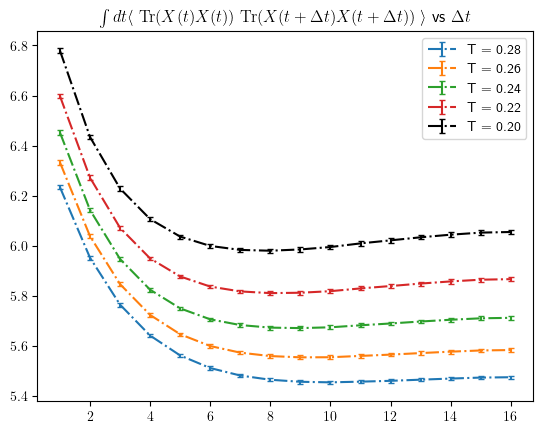

In [14]:
plt.errorbar(t, newdata28, newerrors28, fmt='-.', label="T = 0.28", capsize=2)
plt.errorbar(t, newdata26, newerrors26, fmt='-.', label="T = 0.26", capsize=2)
plt.errorbar(t, newdata24, newerrors24, fmt='-.', label="T = 0.24", capsize=2)
plt.errorbar(t, newdata22, newerrors22, fmt='-.', label="T = 0.22", capsize=2)
plt.errorbar(t, newdata2, newerrors2, fmt='-.', label="T = 0.20", capsize=2, color='black')
plt.title(r"$\int dt \langle ~\mathrm{Tr}(X(t)X(t)) ~ \mathrm{Tr}(X(t + \Delta t)X(t + \Delta t)) ~ \rangle$ vs $\Delta t$" )
# plt.errorbar(t, newdata18, newerrors18, fmt='-.', label=0.18)
# plt.errorbar(t, newdata16, newerrors16, fmt='-.', label=0.16)
# plt.errorbar(t, newdata14, newerrors14, fmt='-.', label=0.14)
# plt.errorbar(t, newdata12, newerrors12, fmt='-.', label=0.12)
# plt.errorbar(t, newdata1, newerrors1, fmt='-.', label=0.10)
plt.legend(loc = 'best')
plt.savefig("temps_0.28-0.20.png", dpi=500)


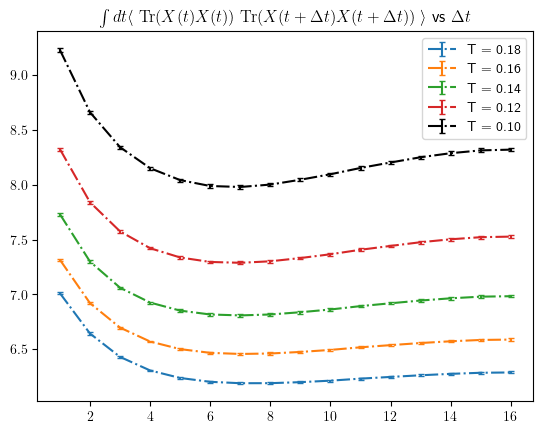

In [15]:
plt.errorbar(t, newdata18, newerrors18, fmt='-.', label="T = 0.18", capsize=2)
plt.errorbar(t, newdata16, newerrors16, fmt='-.', label="T = 0.16", capsize=2)
plt.errorbar(t, newdata14, newerrors14, fmt='-.', label="T = 0.14", capsize=2)
plt.errorbar(t, newdata12, newerrors12, fmt='-.', label="T = 0.12", capsize=2)
plt.errorbar(t, newdata1, newerrors1, fmt='-.', label="T = 0.10", capsize=2, color='black')
plt.title(r"$\int dt \langle ~\mathrm{Tr}(X(t)X(t)) ~ \mathrm{Tr}(X(t + \Delta t)X(t + \Delta t)) ~ \rangle$ vs $\Delta t$" )

plt.legend(loc='best')
plt.savefig("temps_0.18-0.10.png", dpi=500)

<ErrorbarContainer object of 3 artists>

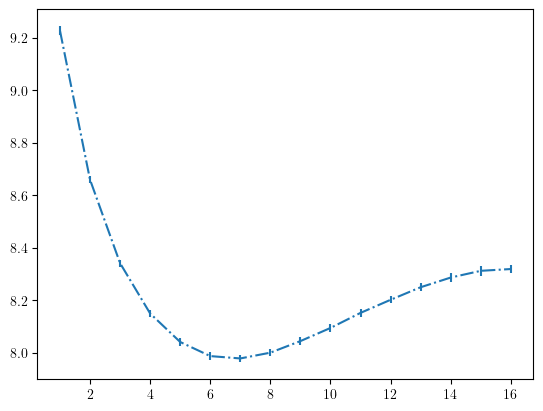

In [16]:
plt.errorbar(t, newdata1, newerrors1, fmt='-.', label=0.10)
